# Discrete Fourier Transform (DFT) simulation




In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [31]:
def plotit(x, y, n, subplot, freq, xlab):
    '''To plot the sine signal'''
    
    plt.figure(figsize = (20,15))
    plt.subplot(4,1,subplot)
    plt.grid(True, which='both')
    plt.ylabel("Amplitude(A)")
    plt.xlabel(xlab)
    plt.title("Freq "+ freq+ " Hz")

    for i in range(n):
      plt.plot(x, y[i])

    plt.show()

def dft(add_sine, n, ref_amp):
    '''To do DFT using reference sine wave and combined sine wave'''
    
    dft_val = []
    
    for f in range(n):
        
        dft_sum = 0
        ref_sine = ref_amp * np.sin(2 * np.pi * f * x / Fs)

        for i in range(Fs):
            
            dft_sum += ref_sine[i] * add_sine[i]

        dft_val.append(dft_sum)

        if(round(dft_sum) > 0):
            print("\n#####################################")
        
        print("Freq: ",f, " | Sum: ",dft_sum)
        
        if(round(dft_sum) > 0):
            print("#####################################\n")

    return dft_val

def single_freq_dft(add_sine, int_freq, ref_amp):
    '''To test ft with different freq'''

    prod = []
    int_ref_sine = ref_amp * np.sin(2 * np.pi * int_freq * x / Fs)

    for i in range(Fs):
            prod.append(int_ref_sine[i] * add_sine[i])

    return prod, int_ref_sine

def plt_comp(x, prod, ref_sine, add_sine):
    '''Plot to compare waves'''

    plt.figure(figsize = (30,10))

    plt.plot(x, prod, '--', c = 'r', label='amp_contribution')
    plt.plot(x, ref_sine, c = 'g', label='ref_sine_wave')
    plt.plot(x, add_sine, c = 'b', label='add_sine_wave')

    plt.grid(True, which='both')
    plt.ylabel("Amplitude(A)")
    plt.xlabel("Samples (N)")
    plt.title("Amplitude contribution")
    leg = plt.legend(loc ="upper right");

    plt.show()

# Create Input Sine waves.
Two sine waves generated at two different frequencies with unit amplitude,
*   Freq = 5 Hz, Amplitude = 1
*   Freq = 10 Hz, Amplitude = 1

These two sine waves added together to make a combined time domain signal that consists of two different frequecy signals.





In [32]:
# Sampling frequency
Fs = 1000
x = np.arange(Fs)

# Frequency for the input signals
freq1 = 5
freq2 = 10

# Amplitude of the input signals
amp1 = 1
amp2 = 1

# Sine Signal1 
sine1 = amp1 * np.sin(2 * np.pi * freq1 * x / Fs)

# Sine Signal2
sine2 = amp2 * np.sin(2 * np.pi * freq2 * x / Fs)

# Combined Sine signal
add_sine = sine1 + sine2 

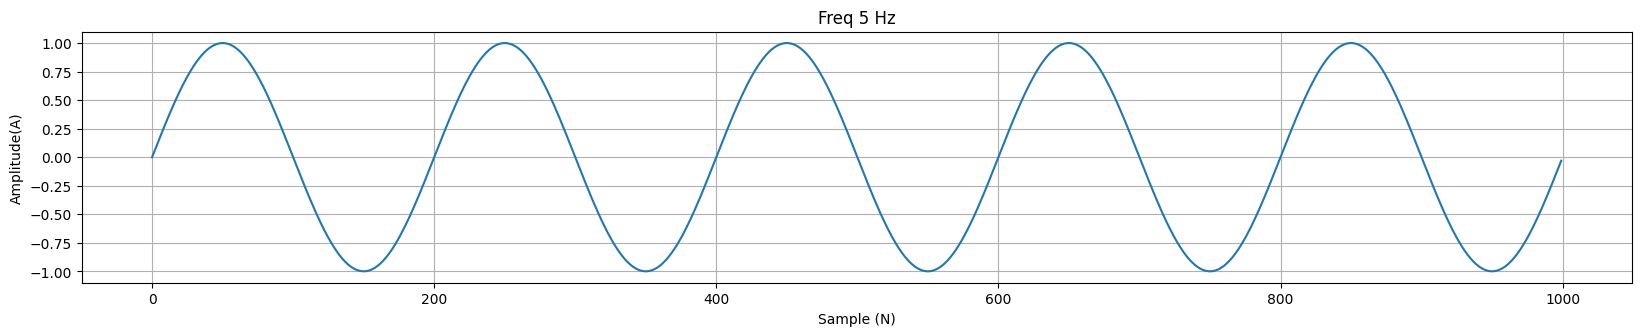

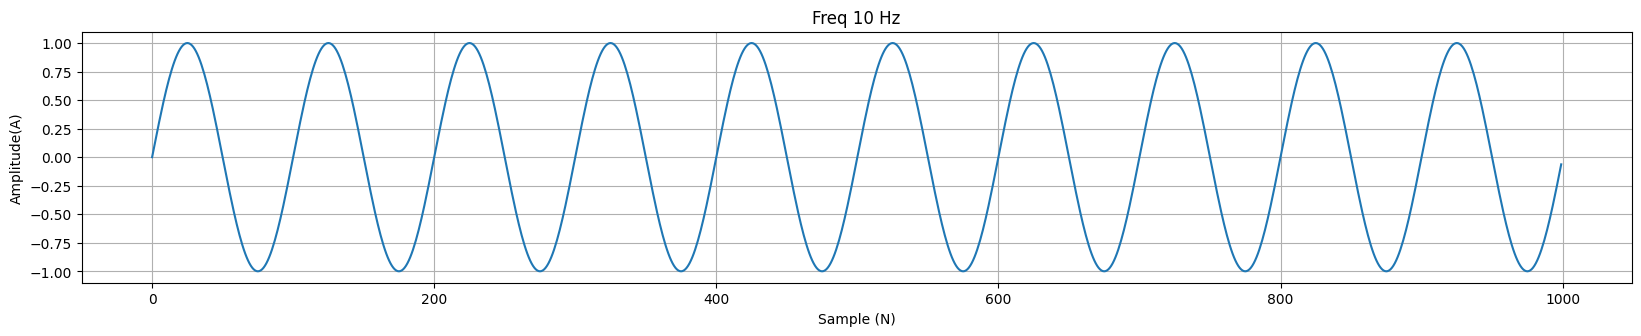

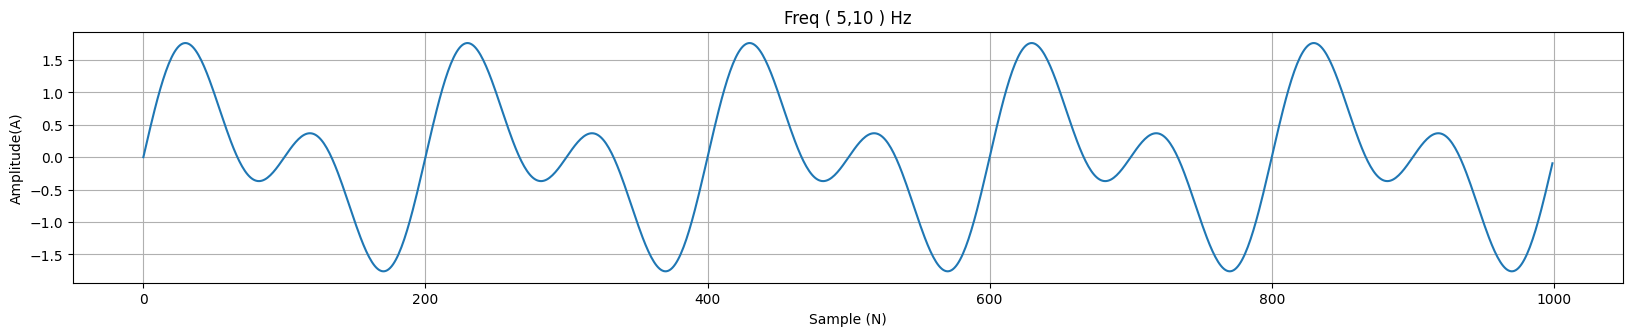

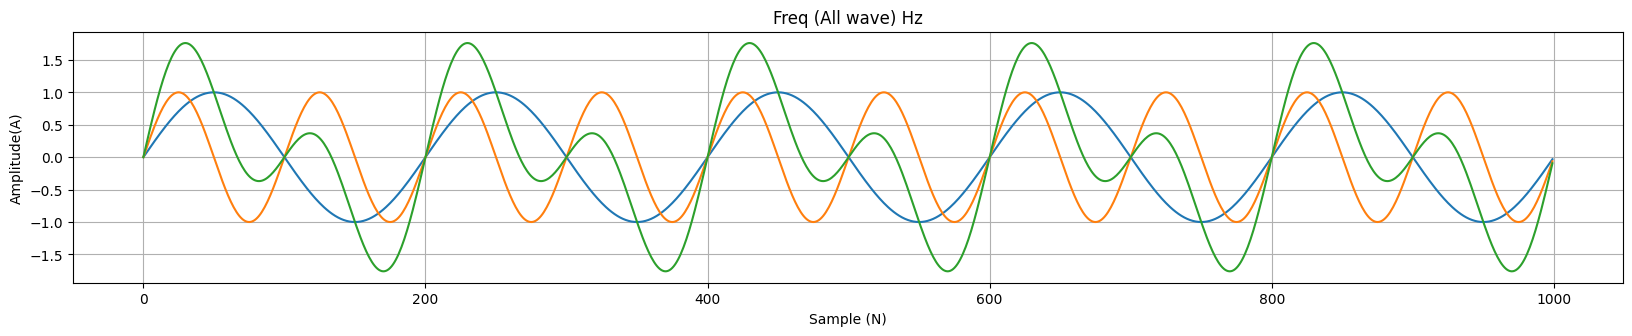

In [33]:
# Plot Sine wave1
plotit(x, [sine1], 1, 1, str(freq1), "Sample (N)")

# Plot Sine wave2
plotit(x, [sine2], 1, 2, str(freq2), "Sample (N)")

# Plot Combined Sine wave
plotit(x, [add_sine], 1, 3, "( " + str(freq1) +"," +str(freq2)+ " )", "Sample (N)")

#Plot All Sine waves
plotit(x, [sine1, sine2, add_sine], 3, 4, '(All wave)', "Sample (N)")

# Calculating DFT
Applying DFT to the combined sine wave to find the frequency components in it. 



In [34]:
num_freq = 20
ref_amp = 1

# DFT
dft_val = dft(add_sine, num_freq, ref_amp)

Freq:  0  | Sum:  0.0
Freq:  1  | Sum:  -9.189838560269559e-14
Freq:  2  | Sum:  -7.547348163106093e-15
Freq:  3  | Sum:  9.036868475753579e-14
Freq:  4  | Sum:  -3.18104917407247e-15

#####################################
Freq:  5  | Sum:  499.99999999999983
#####################################

Freq:  6  | Sum:  -1.5002365669203321e-13
Freq:  7  | Sum:  2.1409957140505753e-14
Freq:  8  | Sum:  5.374867217966539e-14
Freq:  9  | Sum:  6.889974701884682e-14

#####################################
Freq:  10  | Sum:  500.00000000000097
#####################################

Freq:  11  | Sum:  -6.610987798860712e-13
Freq:  12  | Sum:  5.4301181606764004e-14
Freq:  13  | Sum:  1.4725113489655328e-13
Freq:  14  | Sum:  2.211477528879513e-13
Freq:  15  | Sum:  -1.3745775351292622e-13
Freq:  16  | Sum:  -3.130135040052551e-14
Freq:  17  | Sum:  -3.8396022472575453e-13
Freq:  18  | Sum:  2.834364687398505e-14
Freq:  19  | Sum:  -5.166700400849322e-14


### Observation:


*   From the above ft output, the values are greater than  (or equal to 500) at the freq 5 Hz and 10 Hz. 

* i.e ft_sum = (A x N)/2
> where, A = Amplitude of the signal, N = no.of Samples

*   For the other frequencies (that are not in the combined signal),  the value is 0 or negative.





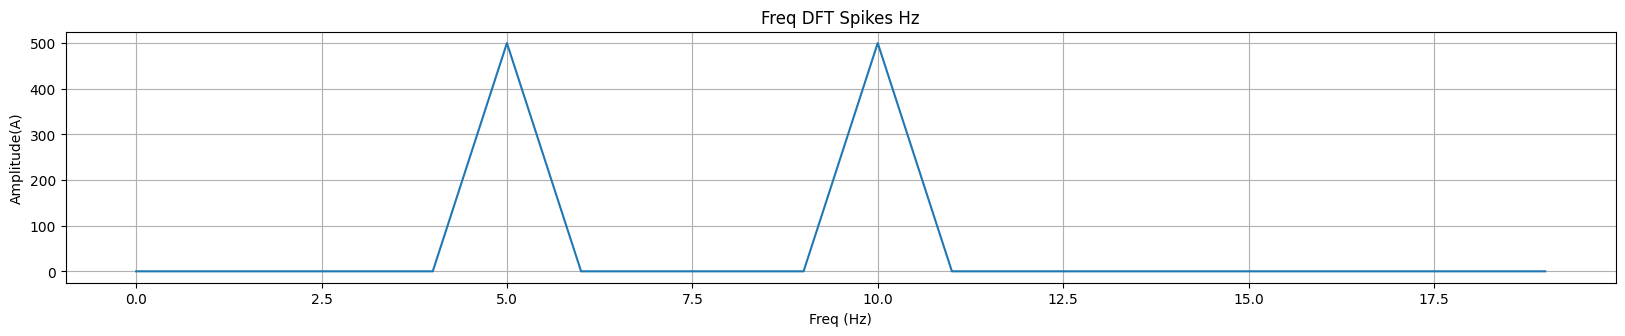

In [35]:
#Plot the dft values 
a = np.arange(0, num_freq, 1, dtype=int)
plotit(a, [dft_val], 1, 1, "DFT Spikes", 'Freq (Hz)')

#### Observation:
##### ft_val = (A X N)/2 = 1 x 1000/2 = 500
Two spikes of amplitude 500 at freq 5 and 10 Hz, zero at other freq that are not present in the combined signal.

### Lets take reference sine signal of freq 5 Hz and do ft.

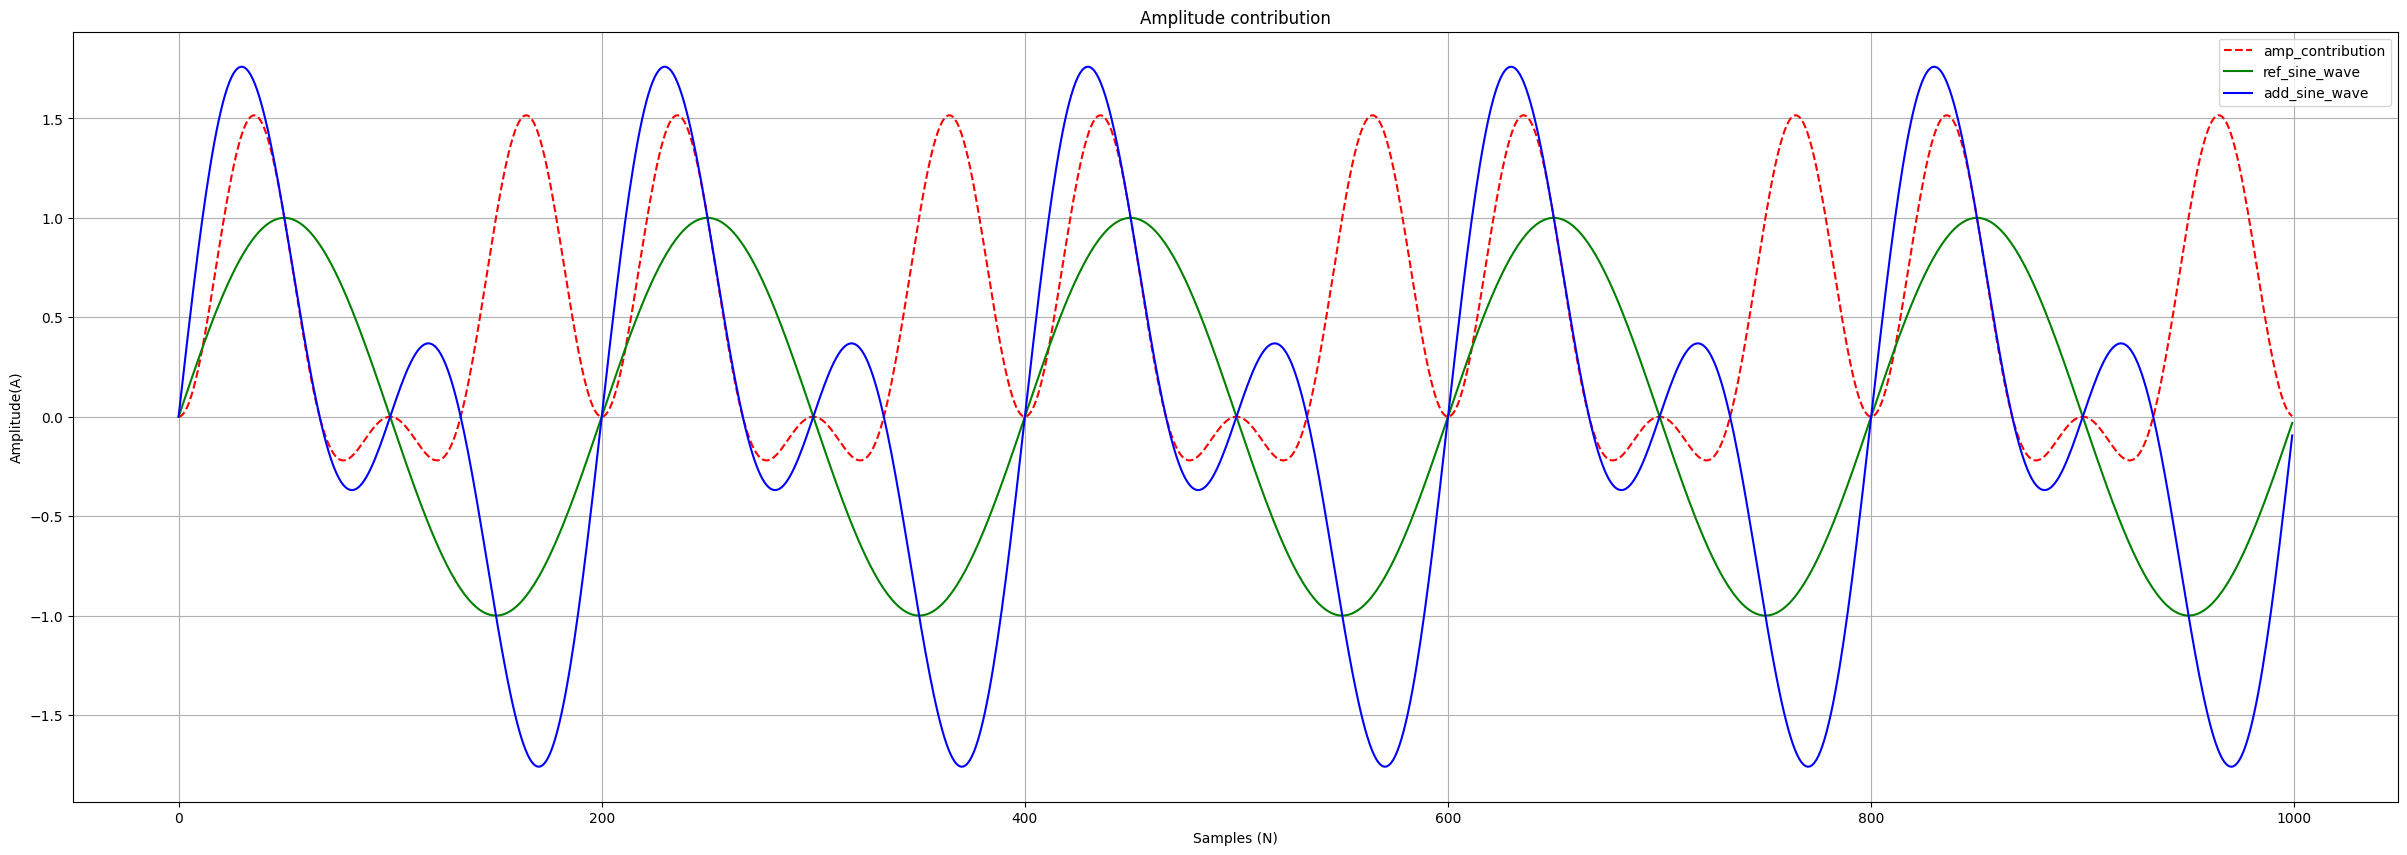

In [36]:
# Reference singnal of Freq 5 Hz (Our Interested Freq)
int_freq = 5
ref_amp = 1
prod, ref_sine = single_freq_dft(add_sine, int_freq, ref_amp)
plt_comp(x, prod, ref_sine, add_sine)

### Observation:
The dotted red signal represents the amplitude contribution of the ref wave in the combined wave. It is mostly positive because the ref wave is present in the combined wave. So adding up the values of the product of ref wave and combined wave (at each sample), it gives 500 (A x N /2). 

### Lets take another ref sine signal of freq 7 Hz and do ft.

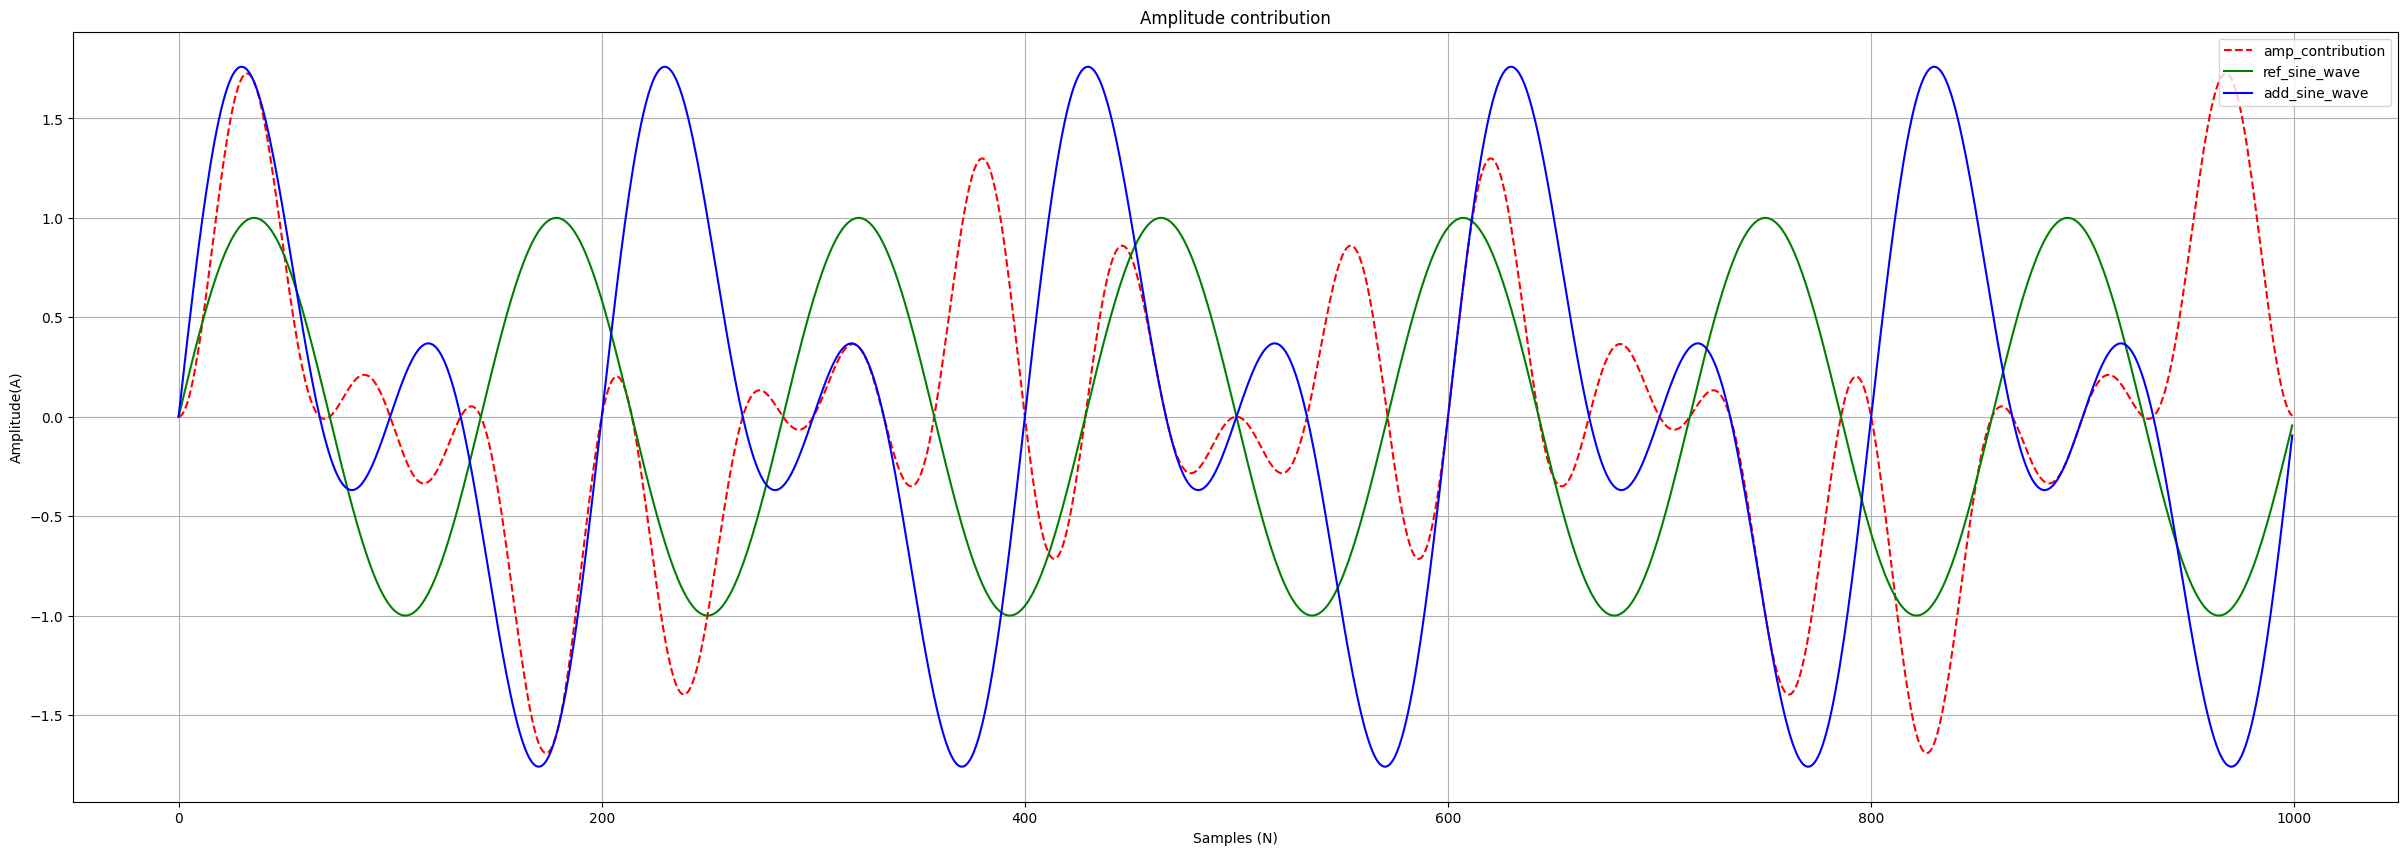

In [37]:
# Reference singnal of Freq 7 Hz (Not Our Interested Freq)
not_int_freq = 7
ref_amp = 1
prod, ref_sine = single_freq_dft(add_sine, not_int_freq, ref_amp)
plt_comp(x, prod, ref_sine, add_sine)

### Observation:
Here the product of the ref wave and combined wave at each samples shows the amplitude contribution of 7 Hz freq in the combined wave. It has both positive and negative peaks. So adding up the values gives zero or negative.

---



## Lets take two sine signals of different frequencies and amplitude.


*   Freq =  5 Hz, Amplitude = 3
*   Freq = 10 Hz, Amplitude = 1



In [38]:
# Sampling frequency
Fs = 1000
x = np.arange(Fs)

# Frequency for the input signals
freq1 = 5
freq2 = 10

# Amplitude of the input signals
amp1 = 3
amp2 = 1

# Sine Signal1 
sine1 = amp1 * np.sin(2 * np.pi * freq1 * x / Fs)

# Sine Signal2
sine2 = amp2 * np.sin(2 * np.pi * freq2 * x / Fs)

# Combined Sine signal
add_sine = sine1 + sine2 

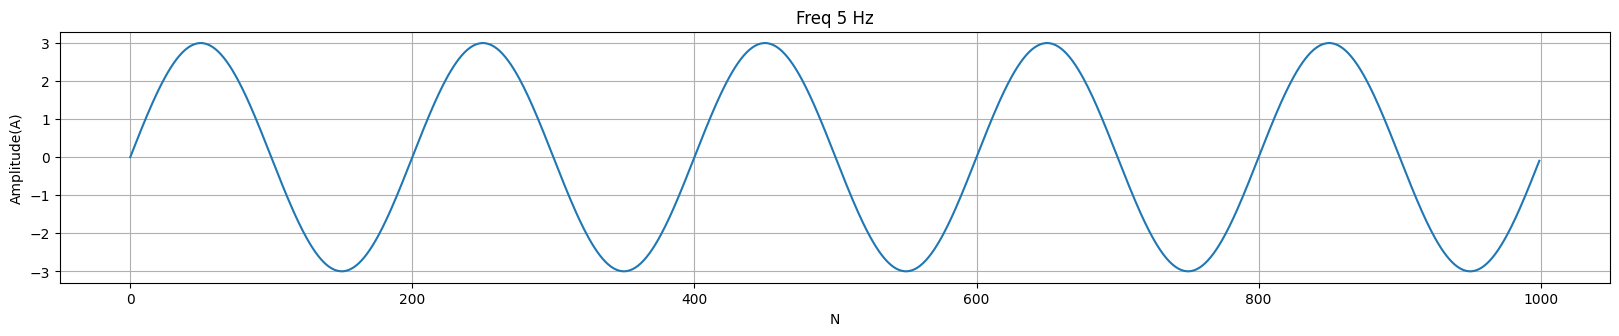

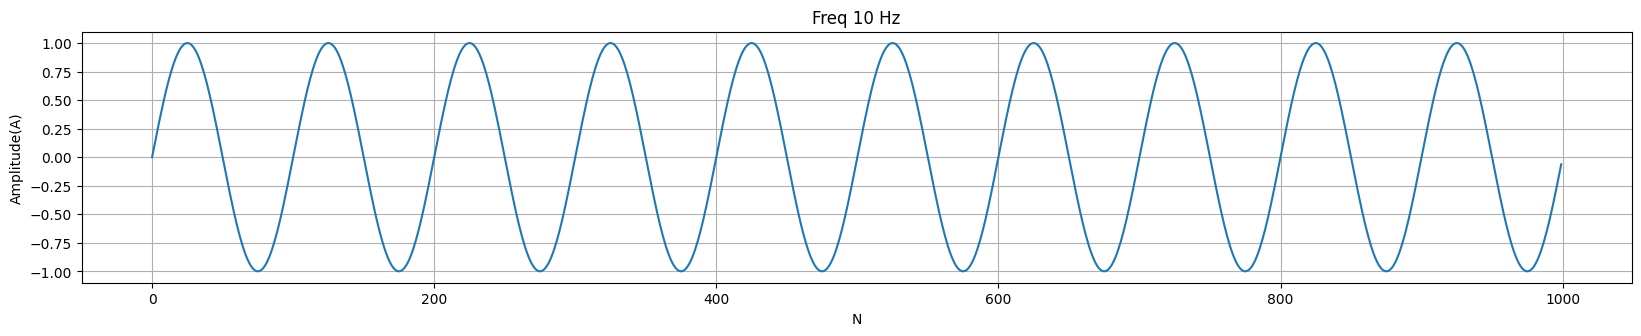

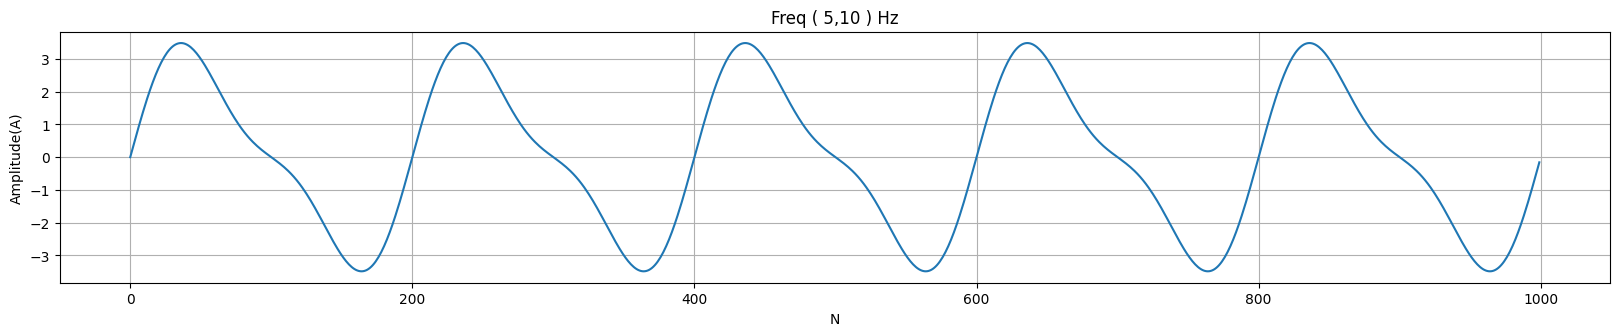

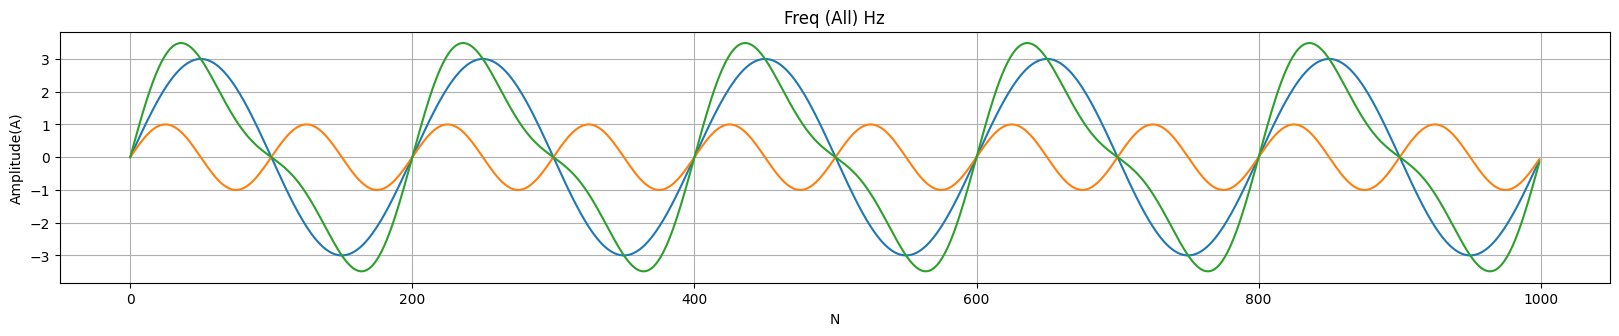

In [39]:
# Plot Sine wave1
plotit(x, [sine1], 1, 1, str(freq1), "N")

# Plot Sine wave2
plotit(x, [sine2], 1, 2, str(freq2), "N")

# Plot Combined Sine wave
plotit(x, [add_sine], 1, 3, "( " + str(freq1) +"," +str(freq2)+ " )", "N")

#Plot All Sine waves
plotit(x, [sine1, sine2, add_sine], 3, 4, '(All)', "N")

In [40]:
num_freq = 20
ref_amp = 1

# DFT
dft_val = dft(add_sine, num_freq, ref_amp)

Freq:  0  | Sum:  0.0
Freq:  1  | Sum:  4.041472018156966e-15
Freq:  2  | Sum:  -1.825904878682838e-13
Freq:  3  | Sum:  -3.977373985719623e-14
Freq:  4  | Sum:  -7.107248817250778e-14

#####################################
Freq:  5  | Sum:  1499.9999999999998
#####################################

Freq:  6  | Sum:  4.989238189256895e-14
Freq:  7  | Sum:  1.0526388788401064e-13
Freq:  8  | Sum:  4.2429601498916725e-14
Freq:  9  | Sum:  1.603023269680648e-13

#####################################
Freq:  10  | Sum:  500.0000000000012
#####################################

Freq:  11  | Sum:  -7.205347429817266e-13
Freq:  12  | Sum:  3.7659111939980505e-14
Freq:  13  | Sum:  3.294153144706158e-13
Freq:  14  | Sum:  6.697663257337894e-13
Freq:  15  | Sum:  -2.58269100550379e-13
Freq:  16  | Sum:  -9.972231374000273e-14
Freq:  17  | Sum:  -1.1055080462174516e-12
Freq:  18  | Sum:  -8.57300341827738e-15
Freq:  19  | Sum:  -1.4562309691434905e-13


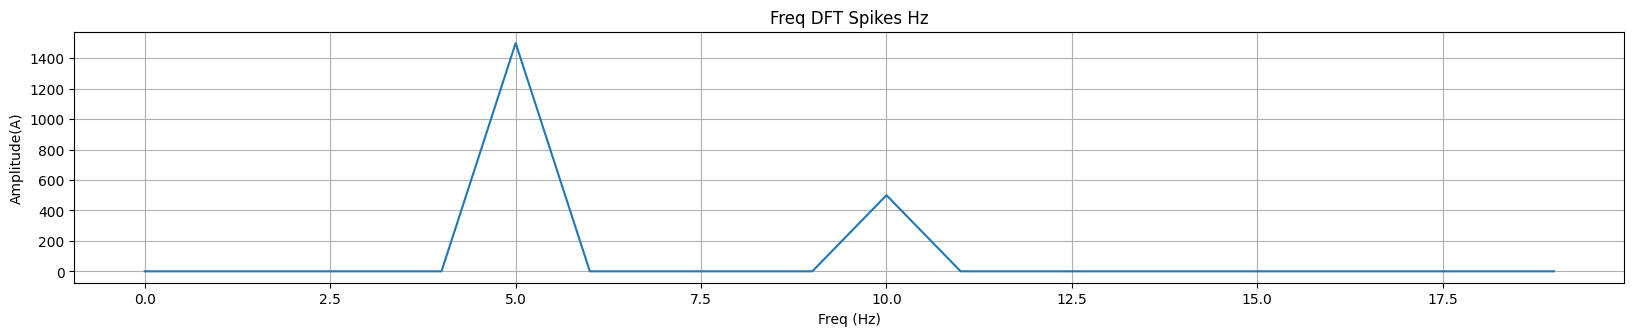

In [41]:
#Plot the dft values 
a = np.arange(0, num_freq, 1, dtype=int)
plotit(a, [dft_val], 1, 1, "DFT Spikes", 'Freq (Hz)')

#### Observation:
##### Here the amplitude of the spikes at 5Hz and 10Hz are 1500 and 500 respectively.

*   For the sine wave of freq 5 Hz and amplitude 3,
        (A x N)/2 = 3 x 1000/2 = 1500
*   For the sine wave of freq 10 Hz and amplitude 1,
        (A x N)/2 = 1 x 1000/2 = 500



                                                        [END]
